In [1]:
import sys
sys.path.append("../")
from model import *

from torch.utils.data import DataLoader
import torchvision.datasets as dset
from torch.autograd import Variable
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import manifold
from sklearn import metrics
from scipy import stats
from ALImisc import *
from ALImodel import *
from ALIloader import *
from PIL import Image
from skopt.space import Real, Integer
from skopt import Optimizer

newseed = 13
print(newseed)
np.random.seed(newseed)
LS = 512 #Latent Space Size
ColorsNumber = 1 #Number of color (always 1 for x-ray)
isize = 64

name = "Exp_64_512_0.00001_RandomLabel_4.0"

datadir = "./ChestXray-NIHCC-2/"

ExpDir = "../model/"+name


batch_size = 10


def GetAlphaRedMap(cmap):
    #Print Rebuild
    # Get the colormap colors
    AlphaRed = cmap(np.arange(cmap.N))
    # Set alpha
    AlphaRed[:,-1] = np.linspace(0, 1, cmap.N)
    # Create new colormap
    AlphaRed = ListedColormap(AlphaRed)
    return(AlphaRed)
AlphaRed = GetAlphaRedMap(plt.cm.Reds)

CP = -2 #Checkpoint to load (-2 for latest one, -1 for last epoch)
DisX,DisZ,DisXZ,GenZ,GenX,CP,DiscriminatorLoss,AllAUCs = GenModel(isize,LS,-2,ExpDir,name,ColorsNumber=ColorsNumber)

DisX = DisX.eval()
DisZ = DisZ.eval()
DisXZ = DisXZ.eval()
GenZ = GenZ.eval()
GenX = GenX.eval()


def TransformPImg(pim,inputsize,ar):
    tx = ar[0]
    ty = ar[1]
    rot = ar[2]
    sc = ar[3]
    brightness_factor = ar[4]
    contrast_factor = ar[5]
    tim = transforms.functional.affine(pim,angle=rot, translate=[tx,ty], 
                                                   scale=1, shear=0, resample=0, fillcolor=0)
    
    tim = transforms.functional.adjust_brightness(tim, brightness_factor)
    tim = transforms.functional.adjust_contrast(tim, contrast_factor)
    data_transforms = transforms.Compose([transforms.CenterCrop(sc)])
    ftim = data_transforms(tim)
    reim = transforms.functional.resize(ftim,inputsize)
    tim = transforms.functional.to_tensor(reim)
    tim = tim.reshape(1,1,inputsize,inputsize)
    return(ftim,tim)
    




def OutScore(DisX,DisZ,DisXZ,GenZ,GenX,X):
    z = GenZ(X)
    Xr = GenX(z)
    
    
    DiffX = Xr - X
    
    
    RealCat= torch.cat((DisZ(z), DisX(X)), 1)
    PredReal  = DisXZ(RealCat)

    
    if torch.cuda.is_available():
        DiffX = DiffX.cpu()
    
    DiffX = DiffX.detach().numpy()
    DiffX = np.power(DiffX,2)
    RecLoss = [np.sqrt(np.mean(x)) for x in DiffX]

    return(RecLoss,Xr.detach().numpy(),DiffX,PredReal.detach().numpy())



Paths = glob.glob("/media/vince/MILA/Chest_data/MURA-v1.1/valid/*/*/*/*")

Paths = glob.glob("/media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/*.png")

RandInt = 10
Explore = 10
Paths = np.random.permutation(Paths)


13
I found this last checkpoint 2121000
Checkpoint 2121000 exist, will load param and start training from there
../model/Exp_64_512_0.00001_RandomLabel_4.0/models/Exp_64_512_0.00001_RandomLabel_4.0_DisX_It_2121000.pth


In [2]:
Paths

array(['/media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00000116_028.png',
       '/media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00008275_002.png',
       '/media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00012428_000.png',
       ...,
       '/media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00005238_003.png',
       '/media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00012021_020.png',
       '/media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00012045_042.png'],
      dtype='<U70')

0 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00000116_028.png


/media/vince/anaconda3/envs/xray/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


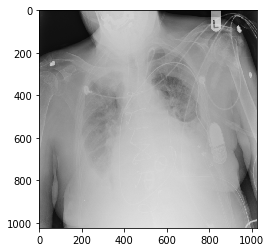

1 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00008275_002.png


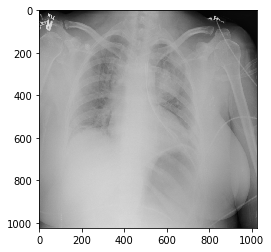

2 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00012428_000.png


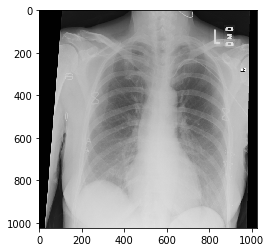

3 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00002238_005.png


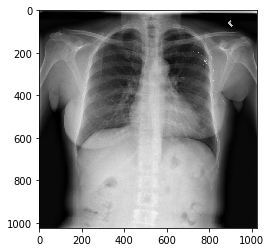

4 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00002608_000.png


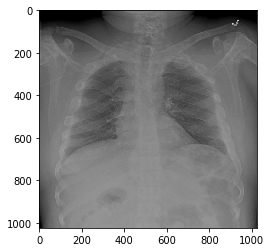

5 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00002570_003.png


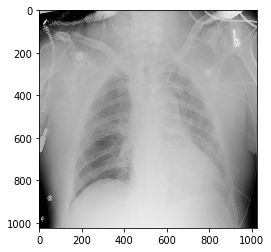

6 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00001836_040.png


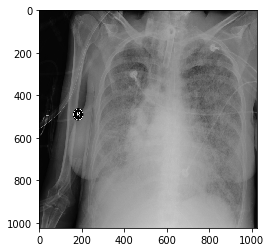

7 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00011104_000.png


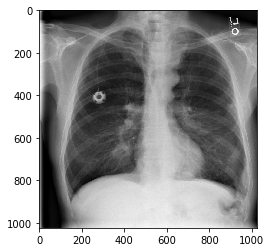

8 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00020673_026.png


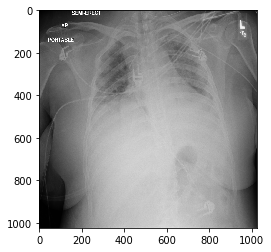

9 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00025317_004.png


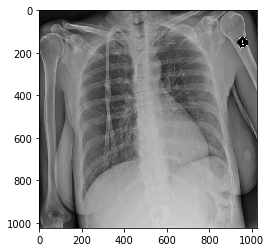

10 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00012064_003.png


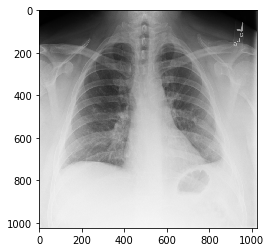

11 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00006446_007.png


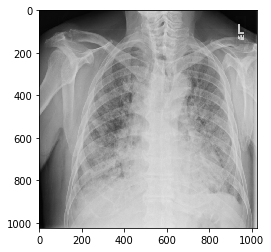

12 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00018055_042.png


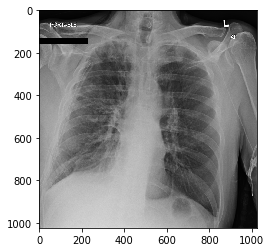

13 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00011241_002.png


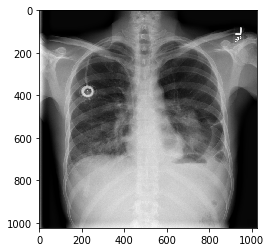

14 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00019926_001.png


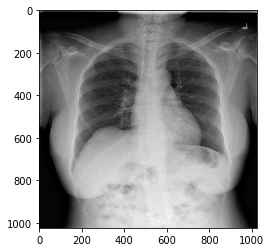

15 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00027333_001.png


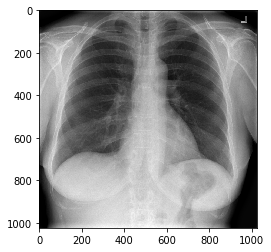

16 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00012804_010.png


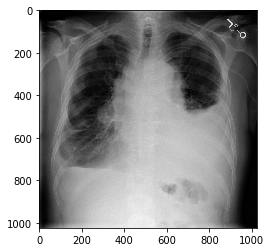

17 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00012032_000.png


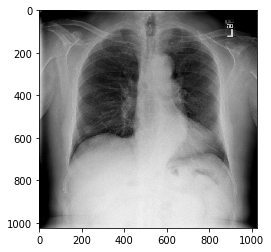

18 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00003553_000.png


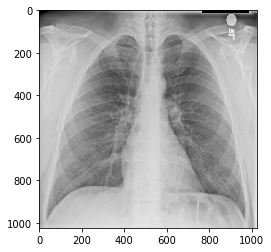

19 /media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00009475_000.png


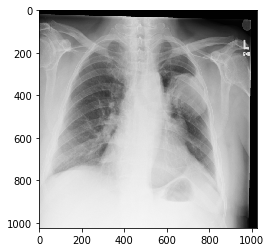

In [3]:
for i in range(20):
    ptf = Paths[i]
    print(i,ptf)

    name = "Align_"+"_".join(ptf.split("/")[-2:])

    im = misc.imread(ptf)
    if len(im.shape) > 2:
        im = im[:, :, 0]
    #Add color chanel
    im = im[:,:,None]

    padding = 0
    if im.shape[0] > im.shape[1]:
        padding = (int((im.shape[0]-im.shape[1])/2),0)
    else:
        padding = (0,int((im.shape[1]-im.shape[0])/2))

    data_transforms = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Pad(padding,fill=0)
    ])
    pim = data_transforms(im)
    plt.imshow(pim)
    plt.show()


In [13]:
ptf = Paths[13]
ptf = Paths[16]
print(ptf)

name = "Align_"+"_".join(ptf.split("/")[-2:])
print(name)

im = misc.imread(ptf)
if len(im.shape) > 2:
    im = im[:, :, 0]
#Add color chanel
im = im[:,:,None]

padding = 0
if im.shape[0] > im.shape[1]:
    padding = (int((im.shape[0]-im.shape[1])/2),0)
else:
    padding = (0,int((im.shape[1]-im.shape[0])/2))

data_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Pad(padding,fill=0)
])
pim = data_transforms(im)

/media/vince/MILA/Chest_data/ChestXray-NIHCC-2/images/00012804_010.png
Align_images_00012804_010.png


/media/vince/anaconda3/envs/xray/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [22]:


Fimg = []
Errs = []
c = 1

rl = []
Xr = []
DiffX = []
Disc = []
AllTens = []
RandTest = []

DoneTest = []
MinRL = 999
RandTest.append([0,0,0,np.max(np.shape(pim)),1,1])
trans = (np.array(range(20))-10)*10
for x in trans:
    for y in trans:
        for scale in [0.7,0.8,0.9,1]:
            for trot in [0]:
                r = [x,y,rot,int(np.max(np.shape(pim))*scale),1,1]
                if r in DoneTest:
                    continue
                RandTest.append()




        NTest = []
        for r in RandTest:
            if r in NTest:
                continue
            if r in DoneTest:
                continue
            NTest.append(r)
        print(len(NTest),len(RandTest))
        RandTest = NTest


        TensorTsc = torch.tensor([])
        for i in range(len(NTest)):

            FullImg,TensorImg = TransformPImg(pim,isize,NTest[i])
            Fimg.append(FullImg)
            TensorTsc = torch.cat((TensorTsc,TensorImg*2.0-1.0),0)
        if torch.cuda.is_available():
            TensorTsc = TensorTsc.cuda()
        trl,tXr,tDiffX,tDisc = OutScore(DisX,DisZ,DisXZ,GenZ,GenX,TensorTsc)


        tDisc = list(np.ndarray.flatten(tDisc))
        for i in np.argsort(trl)[:10]:
            print(NTest[i],trl[i])
        rl += trl
        Xr += list(tXr)
        DiffX += list(tDiffX)
        Disc += tDisc
        AllTens += list(TensorTsc.detach().numpy())
        DoneTest += RandTest
        
        
        print(np.min(rl))


[-100  -90  -80  -70  -60  -50  -40  -30  -20  -10    0   10   20   30
   40   50   60   70   80   90]
5 41
[0, 0, 0, 1024, 1, 1] 0.3531672
[-100, -100, 0, 819, 1, 1] 0.46271402
[-100, -100, 0, 921, 1, 1] 0.47198388
[-100, -100, 0, 1024, 1, 1] 0.48245683
[-100, -100, 0, 716, 1, 1] 0.5057415
0.3531672
4 45
[-100, -90, 0, 921, 1, 1] 0.4567802
[-100, -90, 0, 819, 1, 1] 0.4591744
[-100, -90, 0, 1024, 1, 1] 0.4693468
[-100, -90, 0, 716, 1, 1] 0.5021787
0.3531672
4 44
[-100, -80, 0, 921, 1, 1] 0.44488248
[-100, -80, 0, 819, 1, 1] 0.45578066
[-100, -80, 0, 1024, 1, 1] 0.4583313
[-100, -80, 0, 716, 1, 1] 0.495814
0.3531672
4 44
[-100, -70, 0, 921, 1, 1] 0.42767254
[-100, -70, 0, 1024, 1, 1] 0.4456637
[-100, -70, 0, 819, 1, 1] 0.45100605
[-100, -70, 0, 716, 1, 1] 0.49016103
0.3531672
4 44
[-100, -60, 0, 921, 1, 1] 0.41300005
[-100, -60, 0, 1024, 1, 1] 0.43181032
[-100, -60, 0, 819, 1, 1] 0.44849837
[-100, -60, 0, 716, 1, 1] 0.4832125
0.3531672
4 44
[-100, -50, 0, 921, 1, 1] 0.41015193
[-100, -5

[-80, 10, 0, 1024, 1, 1] 0.33238333
[-80, 10, 0, 921, 1, 1] 0.3656039
[-80, 10, 0, 819, 1, 1] 0.40779415
[-80, 10, 0, 716, 1, 1] 0.45328274
0.28790128
4 44
[-80, 20, 0, 1024, 1, 1] 0.30512434
[-80, 20, 0, 921, 1, 1] 0.35745484
[-80, 20, 0, 819, 1, 1] 0.40305716
[-80, 20, 0, 716, 1, 1] 0.44486997
0.28790128
4 44
[-80, 30, 0, 1024, 1, 1] 0.29624128
[-80, 30, 0, 921, 1, 1] 0.35182208
[-80, 30, 0, 819, 1, 1] 0.39852962
[-80, 30, 0, 716, 1, 1] 0.4390465
0.28790128
4 44
[-80, 40, 0, 1024, 1, 1] 0.29288098
[-80, 40, 0, 921, 1, 1] 0.34944558
[-80, 40, 0, 819, 1, 1] 0.39289457
[-80, 40, 0, 716, 1, 1] 0.43453962
0.28790128
4 44
[-80, 50, 0, 1024, 1, 1] 0.29102215
[-80, 50, 0, 921, 1, 1] 0.34768185
[-80, 50, 0, 819, 1, 1] 0.38681433
[-80, 50, 0, 716, 1, 1] 0.4287239
0.28790128
4 44
[-80, 60, 0, 1024, 1, 1] 0.3025299
[-80, 60, 0, 921, 1, 1] 0.34829825
[-80, 60, 0, 819, 1, 1] 0.3829826
[-80, 60, 0, 716, 1, 1] 0.42043775
0.28790128
4 44
[-80, 70, 0, 1024, 1, 1] 0.3145878
[-80, 70, 0, 921, 1, 1] 0.32

[-50, -60, 0, 921, 1, 1] 0.39907438
[-50, -60, 0, 1024, 1, 1] 0.4534546
[-50, -60, 0, 819, 1, 1] 0.45756698
[-50, -60, 0, 716, 1, 1] 0.5255685
0.28790128
4 44
[-50, -50, 0, 921, 1, 1] 0.39457121
[-50, -50, 0, 1024, 1, 1] 0.43584642
[-50, -50, 0, 819, 1, 1] 0.45039976
[-50, -50, 0, 716, 1, 1] 0.51786023
0.28790128
4 44
[-50, -40, 0, 921, 1, 1] 0.38853034
[-50, -40, 0, 1024, 1, 1] 0.42073753
[-50, -40, 0, 819, 1, 1] 0.44466102
[-50, -40, 0, 716, 1, 1] 0.51182985
0.28790128
4 44
[-50, -30, 0, 921, 1, 1] 0.38371995
[-50, -30, 0, 1024, 1, 1] 0.40856174
[-50, -30, 0, 819, 1, 1] 0.4394231
[-50, -30, 0, 716, 1, 1] 0.5064261
0.28790128
4 44
[-50, -20, 0, 1024, 1, 1] 0.37929583
[-50, -20, 0, 921, 1, 1] 0.3816143
[-50, -20, 0, 819, 1, 1] 0.43257353
[-50, -20, 0, 716, 1, 1] 0.49993226
0.28790128
4 44
[-50, -10, 0, 1024, 1, 1] 0.35185695
[-50, -10, 0, 921, 1, 1] 0.37979883
[-50, -10, 0, 819, 1, 1] 0.4252643
[-50, -10, 0, 716, 1, 1] 0.49510574
0.28790128
4 44
[-50, 0, 0, 1024, 1, 1] 0.35100138
[-50,

KeyboardInterrupt: 

0.3531672 0.71704787


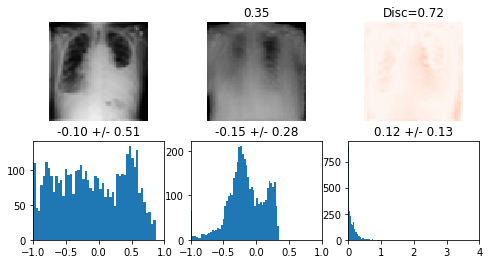

0.28790128 0.5017542


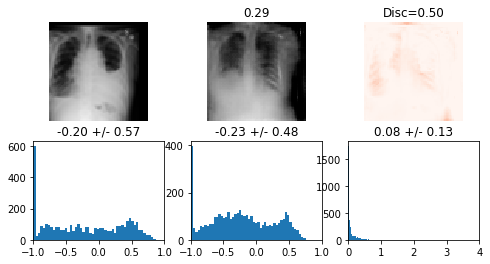

0.28795418 0.4876899


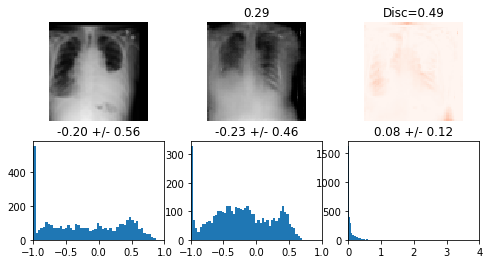

0.2898851 0.5233742


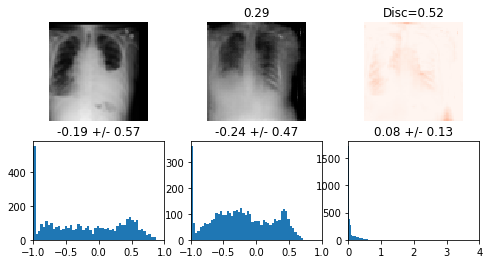

0.29092795 0.47423837


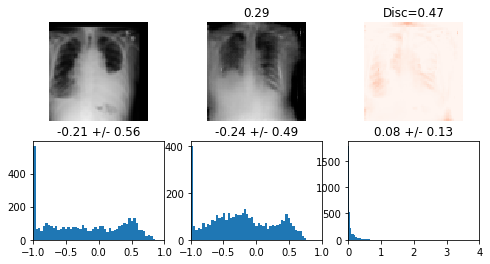

0.29102215 0.4687969


In [ ]:
ind = [0] + list(np.argsort(rl))[:5] + list(np.argsort(rl))[-5:]
printed = 0
for i in ind:
    #if rl[i] > rl[0]:
    #    continue
    #if uTransf[i] > 0.1:
    #    continue
    print(rl[i],Disc[i])
    fig = plt.figure(figsize=(8,4))
    c = 1
    plt.subplot(2,3,c)
    plt.imshow(AllTens[i][0],cmap="gray",vmin=-1,vmax=1)
    #plt.title("TransfLoss=%.6f" % (uTransf[i]))
    

    #plt.title("%.2f" % (rl[i]))
    plt.axis("off")
    c += 1

    plt.subplot(2,3,c)
    plt.imshow(Xr[i][0],cmap="gray",vmin=-1,vmax=1)
    plt.title("%.2f" % (rl[i]))
    plt.axis("off")
    c += 1
    plt.subplot(2,3,c)
    plt.imshow(DiffX[i][0],cmap="Reds",vmin=0,vmax=4)
    #plt.title("Error:%.2f" % (rl[i]))
    plt.title("Disc=%.2f" % (Disc[i]))
    plt.axis("off")
    c += 1
    plt.subplot(2,3,c)
    flat = np.ndarray.flatten(AllTens[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(-1,1)

    c += 1
    plt.subplot(2,3,c)

    flat = np.ndarray.flatten(Xr[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(-1,1)
    c += 1
    plt.subplot(2,3,c)
    flat = np.ndarray.flatten(DiffX[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(0,4)

    plt.show()
    printed += 1
    if printed > 20:
        break


In [9]:



#pim = transforms.functional.to_pil_image(im)

space  = [Integer(-800, 800, name='tx'),
      Integer(-800, 800, name='ty'),
      Real(-180,180, name='rot'),
      Integer(int(np.max(np.shape(pim))/10), np.max(np.shape(pim)), name='sc'),
      Real(0.00001,11.4, name='Bright'),
      Real(0.00001,11.4, name='Contrast')
      ]

#space  = [Integer(-100, 100, name='tx'),
#      Integer(-100, 100, name='ty'),
#      Real(-180,180, name='rot'),
#      Integer(int(np.max(np.shape(pim))/10), np.max(np.shape(pim)), name='sc'),
#      Real(0.8,1.2, name='Bright'),
#      Real(0.8,1.2, name='Contrast')
#      ]




#Get random value


Fimg = []
Errs = []
Explore = 10
RandInt = 20

opt = Optimizer(space,n_initial_points = RandInt)

c = 1

rl = []
Xr = []
DiffX = []
Disc = []
AllTens = []

Xi = []

for it in range(Explore):
    RandTest = []
    totest = opt.ask(n_points=RandInt)
    if it == 0:
        #totest = []
        MinRL = 999
        RandTest.append([0,0,0,np.max(np.shape(pim)),1,1])
        
        for scale in [0.7,0.9,1]:
            for rot in [-15,-5,0,5,15]:
                for b1 in [0.9,1,1.1]:
                    for b2 in [0.9,1,1.1]:
                        RandTest.append([0,0,rot,int(np.max(np.shape(pim))*scale),b1,b2])
        
        
    
    RandTest += totest
    
    NTest = []
    for r in RandTest:
        if r in NTest:
            continue
        NTest.append(r)
    print(len(NTest),len(RandTest))
    RandTest = NTest
    
    
    TensorTsc = torch.tensor([])
    for i in range(len(RandTest)):
        
        FullImg,TensorImg = TransformPImg(pim,isize,RandTest[i])
        Fimg.append(FullImg)
        TensorTsc = torch.cat((TensorTsc,TensorImg*2.0-1.0),0)
    if torch.cuda.is_available():
        TensorTsc = TensorTsc.cuda()
    trl,tXr,tDiffX,tDisc = OutScore(DisX,DisZ,DisXZ,GenZ,GenX,TensorTsc)
    
    rl += trl
    Xr += list(tXr)
    DiffX += list(tDiffX)
    Disc += list(np.ndarray.flatten(tDisc))
    AllTens += list(TensorTsc.detach().numpy())
    Xi += RandTest
    
    
    print(it,np.min(rl))
    opt.tell(RandTest, trl)
    for i in np.argsort(trl)[:10]:
        print(RandTest[i],trl[i])
    #    opt.tell(RandTest[i], trl[i])
    

KeyboardInterrupt: 

In [ ]:
NormTransf = []
for t in np.array(Xi):
    tnorm = []
    for i in range(len(t)):
        #print(i,t[i],space[i].low,space[i].high)
        tnorm.append((t[i]-space[i].low)/(space[i].high-space[i].low))
    NormTransf.append(tnorm)
uTransf = np.mean(np.power(np.array(NormTransf) - np.array(NormTransf[0]),2),axis=1)


plt.scatter(uTransf,rl)
plt.xlabel("Deviation from Init")
plt.ylabel("RecLoss")
plt.show()


In [ ]:
ind = [0] + list(np.argsort(rl))[:5] + list(np.argsort(rl))[-5:]
printed = 0
for i in ind:
    #if rl[i] > rl[0]:
    #    continue
    #if uTransf[i] > 0.1:
    #    continue
    print(rl[i],Disc[i],Xi[i])
    fig = plt.figure(figsize=(8,4))
    c = 1
    plt.subplot(2,3,c)
    plt.imshow(AllTens[i][0],cmap="gray",vmin=-1,vmax=1)
    plt.title("TransfLoss=%.6f" % (uTransf[i]))
    

    #plt.title("%.2f" % (rl[i]))
    plt.axis("off")
    c += 1

    plt.subplot(2,3,c)
    plt.imshow(Xr[i][0],cmap="gray",vmin=-1,vmax=1)
    plt.title("%.2f" % (rl[i]))
    plt.axis("off")
    c += 1
    plt.subplot(2,3,c)
    plt.imshow(DiffX[i][0],cmap="Reds",vmin=0,vmax=4)
    #plt.title("Error:%.2f" % (rl[i]))
    plt.title("Disc=%.2f" % (Disc[i]))
    plt.axis("off")
    c += 1
    plt.subplot(2,3,c)
    flat = np.ndarray.flatten(AllTens[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(-1,1)

    c += 1
    plt.subplot(2,3,c)

    flat = np.ndarray.flatten(Xr[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(-1,1)
    c += 1
    plt.subplot(2,3,c)
    flat = np.ndarray.flatten(DiffX[i][0])
    plt.hist(flat,bins=50)
    plt.title("%.2f +/- %.2f" % (np.mean(flat),np.std(flat)))
    plt.xlim(0,4)

    plt.show()
    printed += 1
    if printed > 20:
        break
